In [72]:
import pandas as pd
import numpy as np
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest 

In [3]:
df = pd.read_csv('spotify_data.csv',index_col = 'Unnamed: 0')
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [4]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [5]:
df = df.drop('track_id', axis=1)
df

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,Boyce Avenue,Fast Car,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473391,Nicola Conte,Black Spirits,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1473392,Nicola Conte,Quiet Dawn,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1473393,Amon Tobin,Morning Ms Candis,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1473394,Peace Orchestra,Happy Christmas (War Is Over),0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [6]:
df.isnull().sum() # нет пропусков

artist_name         0
track_name          0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [7]:
df.describe

<bound method NDFrame.describe of              artist_name                         track_name  popularity  year  \
0             Jason Mraz                    I Won't Give Up          68  2012   
1             Jason Mraz                   93 Million Miles          50  2012   
2          Joshua Hyslop                   Do Not Let Me Go          57  2012   
3           Boyce Avenue                           Fast Car          58  2012   
4           Andrew Belle                   Sky's Still Blue          54  2012   
...                  ...                                ...         ...   ...   
1473391     Nicola Conte                      Black Spirits           4  2011   
1473392     Nicola Conte                         Quiet Dawn           3  2011   
1473393       Amon Tobin                  Morning Ms Candis           2  2011   
1473394  Peace Orchestra      Happy Christmas (War Is Over)           0  2011   
1473395     Mo' Horizons  Hit the Road Jack (Pé Na Éstrada)           3  20

# Проверка на ромальность 

In [75]:
norm_test = df['popularity'].values
kstest(norm_test,'norm')

KstestResult(statistic=0.8063435457310728, pvalue=0.0, statistic_location=2, statistic_sign=-1)

Гипотеза о нормальности распределения отвергается 

### Гистограмма

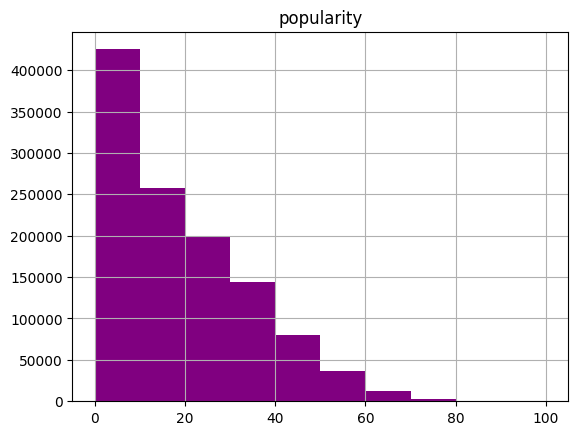

In [22]:
df.hist(column = 'popularity', color = 'purple')
plt.show()

Согласно гистограмме, более 400 тыс песен имеют популярность от 1 до 10, с ростом популярности количество песен соответственно снижается

In [28]:
df['genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'ambient', 'black-metal',
       'blues', 'breakbeat', 'cantopop', 'chicago-house', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death-metal', 'deep-house', 'detroit-techno', 'disco',
       'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
       'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german',
       'gospel', 'goth', 'grindcore', 'groove', 'guitar', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'house',
       'indian', 'indie-pop', 'industrial', 'jazz', 'k-pop', 'metal',
       'metalcore', 'minimal-techno', 'new-age', 'opera', 'party',
       'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house',
       'psych-rock', 'punk', 'punk-rock', 'rock', 'rock-n-roll',
       'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
       'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul',
       'spanish', 'swedish', 'tango', 'tec

### Гистограмма популярности песен по годам

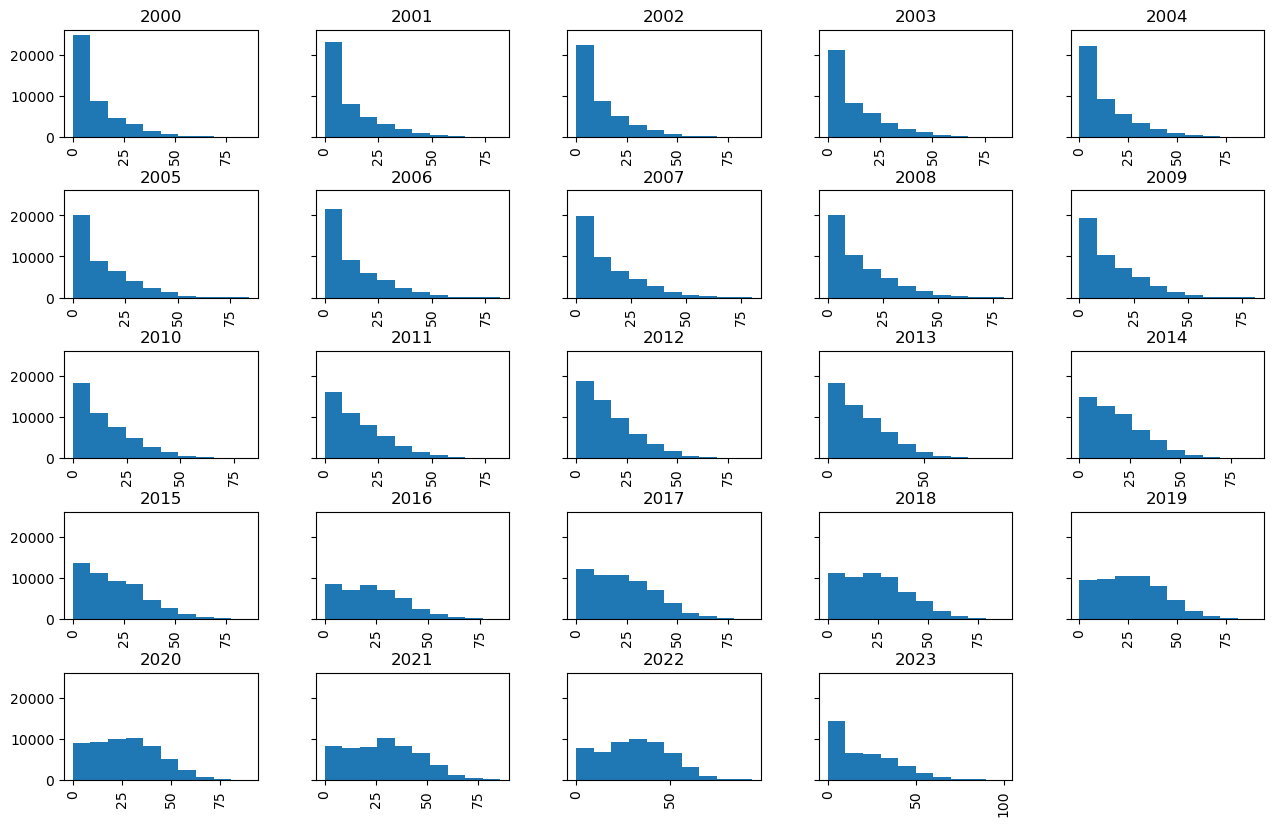

In [19]:
df.hist(
    column = 'popularity',
    by = 'year', 
    sharey = True, 
    figsize = (15,10)
)
plt.show()

### Гистограмма топ-10 самых популярных жанров

Из анализа диаграмм видно, что ~ с 2016 года тенденция, выявленная в общем случае на гистограмме 1, прекращается, т.е. отсутствует сильный перевес количества песен с популярностью (0-10) над остальными. Исключение - 2023 год, но по нему мы имеем неполную картину.

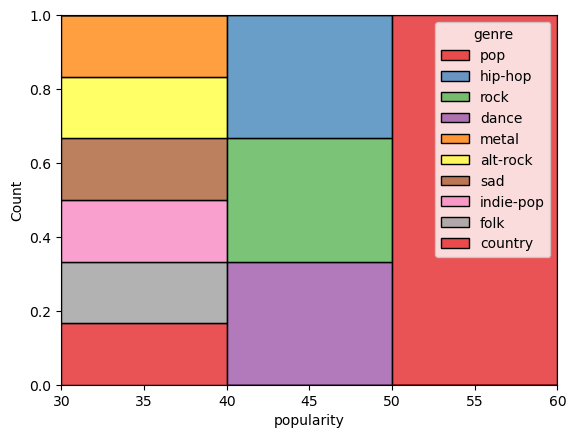

In [64]:
dfg = df[['popularity','genre']].groupby(['genre']).mean().sort_values(['popularity'], ascending = False).head(10).reset_index()
dfg
sns.histplot(
    data = dfg,
    x = 'popularity',
    hue='genre',
    binwidth = 10,
    binrange = [30,60],
    multiple='fill',
    palette = 'Set1')
plt.show()

Диаграмма получена из средних значений популярности песен в каждом жанре. В результате самым популярным жанром оказался поп, следом идут хип хоп, рок и танцевальная музыка

### Ящик с усами для popularity

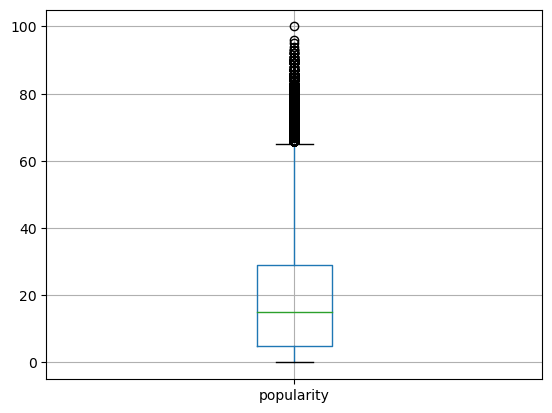

In [94]:
#px.box(data_frame = df,
#y = 'popularity')
df.boxplot(
    column = 'popularity'
)
plt.show()

В соответствии с боксплотом, медианное значение популярности = 15, при этом все значения от 65 до 100, согласно этому графику, считается аномальными точками. 
Сделать точный вывод об истинности такого заявления, судя только по графику, нельзя

## Столбчатая диаграмма популярности по жанрам 

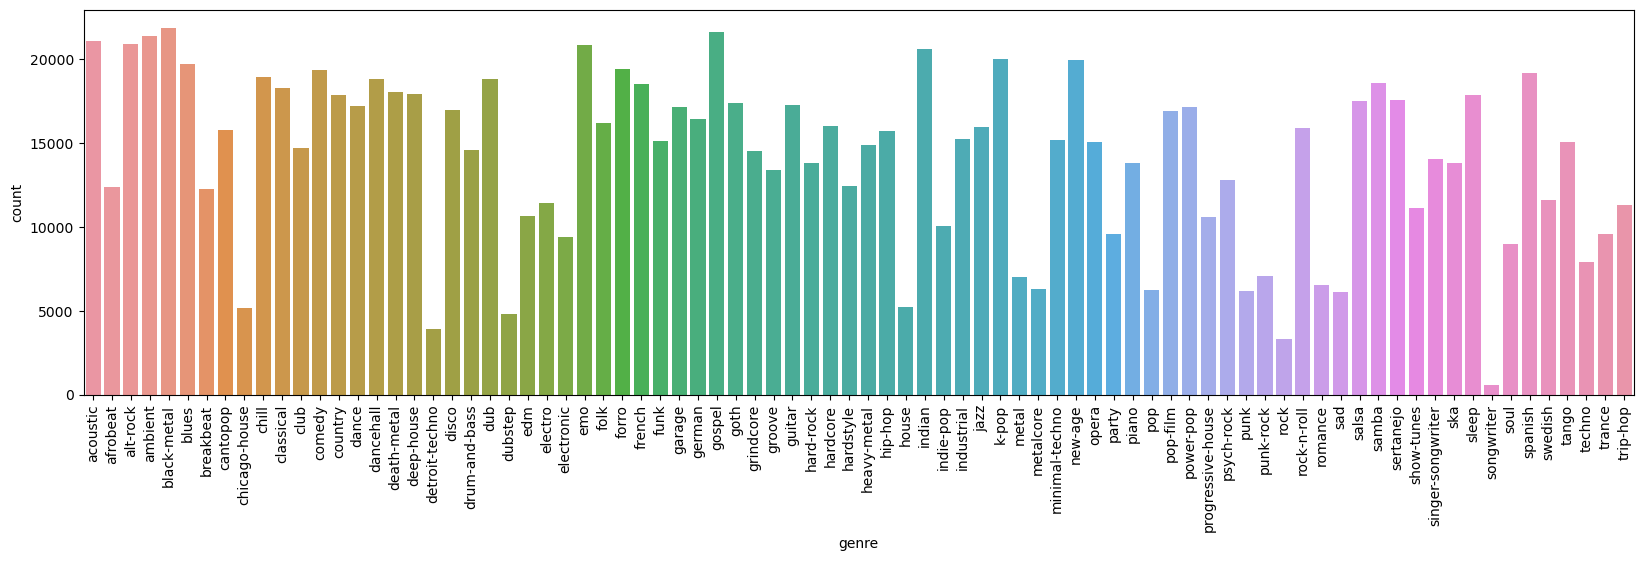

In [90]:
plt.figure(figsize = (20,5))
plt.xticks(size=10)
sns.countplot(
    data = df,
    x = 'genre',
    )
plt.xticks(rotation=90)
plt.show()

Из диаграммы можно сделать вывод о наиболее часто встречаемых жанрах песен: так, мы видим в топе акустику, блюз, гот, инди-поп и тд